# Introduction to Predictive Analysis

The algorithms and techniques seen so far have been focusing on **understanding the data** in different ways. We have seen methods to **summarize the data** (like mean, median, and variance) and to **study the relationship between variables** (like covariance and correlation), and check whether **our conclusions could be generalized to the population** (statistical inference).

However, so far, we have been focusing on **describing the data and its relationships** in a somewhat **passive way**: we **observed** variables or pairs of variables, **computed scores** and **performed tests**.

We will now look at data analysis from a new perspective: that of **predictive modeling**. This is a broad field of data analysis, which is very overlapped with **machine learning**, with two main goals: 
 - **understanding relationships between variables** (inference)
 - **building models which can be used to make predictions on unseen data** (prediction)

In both cases, the first step is to create a **predictive model of the data**. In this lesson, we will formally define what we mean by a "model" and analyze the fundamental principles that guide the construction of effective predictive systems.

Before to begin, let's see a practical example. We will consider the `Diabetes` dataset. Let's load and visualize it:

In [56]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a URL (UCI repository or other sources)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

# Read the dataset
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataset records data about female patients of Pima Indian heritage, aged 21 and older, who were tested for diabetes. It includes the following variables:

- **Pregnancies**: Number of times the patient has been pregnant
- **Glucose**: Plasma glucose concentration after a 2-hour oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history
- **Age**: Age of the patient (in years)
- **Outcome**: Binary indicator of diabetes status (0 = No diabetes, 1 = Diabetes)

## What is a Model?

Before we go further, let's define what we mean by a "model".

In the context of data analysis, a **model is a simplified representation of reality**. It is not reality itself, but a formal abstraction of a real-world process, designed to serve a specific purpose.

A classic analogy is a **geographical map**:
- A map is a **simplification**: it is flat, while the Earth is round. It omits countless details—trees, rocks, buildings.
- In that sense, a map is technically "wrong".

This leads us to a famous aphorism from statistician George Box:

> **"All models are wrong, but some are useful."**

This is one of the most important ideas in modeling. A **data model**—whether statistical or machine learning—is like a map:
- It is a **simplification** of a complex real-world process (e.g., the relationship between blood test results and diabetes).
- It is "wrong" because it cannot capture every nuance of that process.
- But it becomes **useful** if it helps us achieve our goal—whether that goal is to **understand** the process or to **predict** its outcomes.

The "right" model is not the most complex one, but the simplest one that is most useful for our goal.

### Example

Let’s consider a concrete example using the **Pima Indians Diabetes Dataset**.

Suppose we want to understand the distribution of **BMI (Body Mass Index)** among patients. We can summarize this data by fitting a **Gaussian (Normal) distribution** to the BMI values.

This Gaussian distribution *is a model*. It’s a mathematical function defined by two parameters: the mean ($\mu$) and the standard deviation ($\sigma$).

#### Why is this model "wrong"?

1. The actual data consists of a finite set of BMI measurements from real patients. Our model is a smooth, continuous curve that approximates this distribution.
2. The Gaussian model extends from negative infinity to positive infinity. This implies a non-zero probability of a patient having a negative BMI or an extremely high BMI, which are physiologically implausible.
3. The real-world data will never perfectly match the idealized bell curve. There may be skewness, outliers, or multiple peaks that the Gaussian model cannot capture.

#### Why is this model "useful"?

1. **It’s a powerful proxy for the data.** Instead of analyzing hundreds of individual BMI values, we can summarize the entire distribution with just two numbers: $\mu$ and $\sigma$.
2. **It helps us understand the data.** We gain insight into the "typical" BMI and how much variation exists across the population.
3. **It allows us to make reasonable inferences.** For example, we can estimate that approximately 95% of patients have a BMI between $\mu - 2\sigma$ and $\mu + 2\sigma$, which helps in identifying outliers or high-risk individuals.

This simple model, while imperfect, is incredibly useful for understanding the structure of our data.

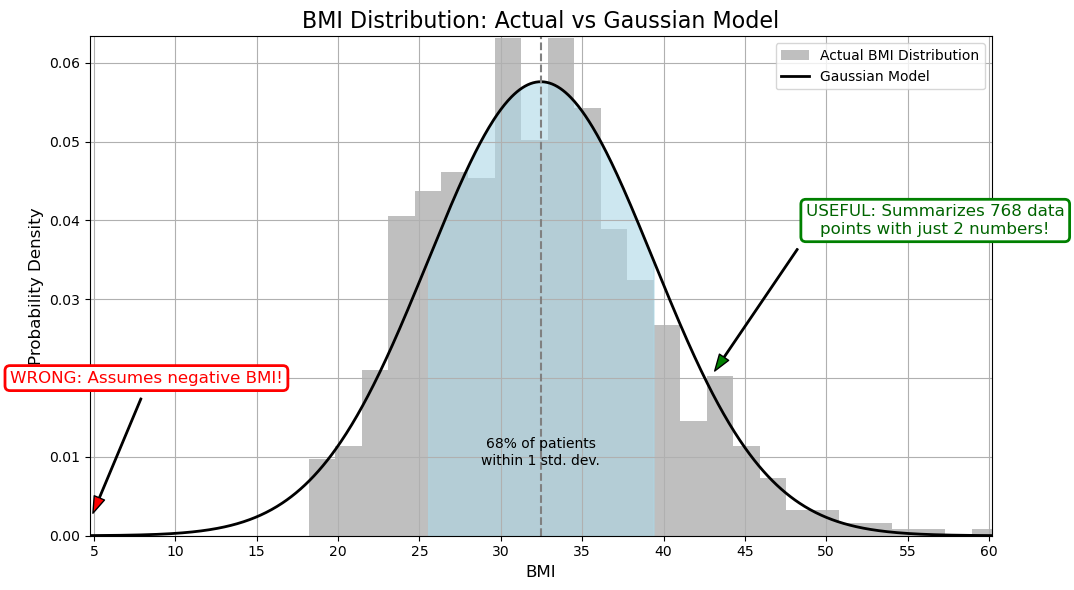

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# Extract the BMI column
# Filter out BMI values that are zero
bmi_data = df['BMI'].dropna()
bmi_data = df[df['BMI'] > 0]['BMI']

mean = bmi_data.mean()
std_dev = bmi_data.std()

# Define the Gaussian model
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histogram of actual BMI data
plt.hist(bmi_data, bins=30, density=True, alpha=0.5, color='gray', label='Actual BMI Distribution')

# Plot Gaussian curve
plt.plot(x, y, 'k-', linewidth=2, label='Gaussian Model')

# Fill the area within 1 standard deviation
x_fill = np.linspace(mean - std_dev, mean + std_dev, 500)
y_fill = stats.norm.pdf(x_fill, mean, std_dev)
plt.fill_between(x_fill, y_fill, color='lightblue', alpha=0.6)

# Add annotations
plt.axvline(mean, color='gray', linestyle='--')
plt.text(mean, y.mean() * 0.5, '68% of patients\nwithin 1 std. dev.', ha='center', fontsize=10)

plt.annotate('WRONG: Assumes negative BMI!',
             xy=(mean - 4*std_dev, 0.002),
             xytext=(mean - 3.5*std_dev, 0.02),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8),
             ha='center', va='center', fontsize=12, color='red',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=2))

plt.annotate('USEFUL: Summarizes 768 data\npoints with just 2 numbers!',
             xy=(mean + 1.5*std_dev, 0.02),
             xytext=(mean + 3.5*std_dev, 0.04),
             arrowprops=dict(facecolor='green', shrink=0.05, width=1, headwidth=8),
             ha='center', va='center', fontsize=12, color='darkgreen',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="green", lw=2))

# Style the plot
plt.title('BMI Distribution: Actual vs Gaussian Model', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.grid()
plt.tight_layout()
plt.xticks(np.arange(round(mean - 4*std_dev), round(mean + 4*std_dev) + 1, 5))
plt.xlim(mean - 4*std_dev, mean + 4*std_dev)
plt.ylim(0, max(y) * 1.1)
plt.legend()
plt.show()

We can also verify this claim numerically:

In [62]:
# Define range for one standard deviation
lower_bound = mean - std_dev
upper_bound = mean + std_dev

# Count how many values fall within this range
within_range = bmi_data[(bmi_data >= lower_bound) & (bmi_data <= upper_bound)]
count_within_range = within_range.count()
total_count = bmi_data.count()
percentage_within_range = (count_within_range / total_count) * 100

# Print results
print(f"Mean BMI: {mean:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Patients within 1 std dev: {count_within_range} out of {total_count}")
print(f"Percentage within 1 std dev: {percentage_within_range:.2f}%")

Mean BMI: 32.46
Standard Deviation: 6.92
Patients within 1 std dev: 513 out of 757
Percentage within 1 std dev: 67.77%


### Predictive Models
Beyond the Guassian example above, when we perform predictive analysis, we assume in general to observe:
- A variable $Y$, which we usually call the **dependent variable** or **response variable** - this is the variable we want to predict;
- A set of variables $X = (X_1,X_2,\ldots,X_n)$, which we usually call our **predictors** - this are variables we want to use to predict $Y$.

We can express a predictive model with this general form:

$$Y = f(X) + \epsilon$$

where:
- $f$ is our predictive model - we want to **find this function** (more on this later);
- $\epsilon$ is the **error term** - since it's very hard to have perfect predictions (e.g., due to randomness in the data), we introduce this term to capture the errors that the model will make.

#### Example
In our example, we may be interested in predicting insulin from glucose. If we look at the data, we may imagine an $f$ function like the one drawn in red in the example below:

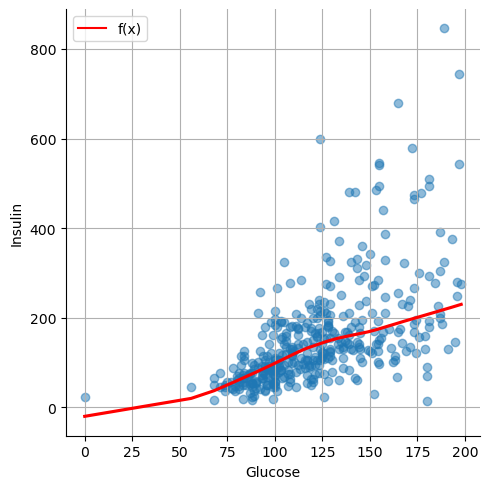

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plot = sns.lmplot(
    x='Glucose',
    y='Insulin',
    data=df[df['Insulin'] > 0],
    lowess=True,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.5}
)

# Add legend manually
ax = plot.axes[0, 0]
ax.plot([], [], color='red', label='f(x)')
ax.legend()
ax.grid()

plt.show()

## The Main Goal: Understanding vs. Predicting

Now that we have a definition of a model, we must address the primary reason for building one. The "usefulness" of a model, as George Box famously said, depends entirely on our goal. In data analysis, we typically pursue two main—sometimes competing—objectives: **Understanding** and **Predicting**.

![](..//_static/lecture_specific/predictive_modeling/why_what.jpeg)

### Understanding (Inference)

The first objective is **Explanation**, or **Statistical Inference**. The central question is **"Why?"**

When our goal is understanding, we use models to open up the "black box" of a real-world process. We aim to quantify relationships between variables and interpret their effects.

- **Primary Goal:** To interpret the model's parameters (e.g., coefficients, p-values) to gain insights.
- **Key Question:** "What is the relationship between variable `X` and variable `Y`?" or "How much does `Y` change if I change `X`?"

**Example (from the Pima Indians Diabetes Dataset):**

Suppose we want to understand how `BMI` and `Glucose` levels influence diabetes. We may build a model which predicts the values of `Outcome` from `BMI` and `Glucose`. Interpreting the model, we may find that:

- A one-unit increase in `BMI` is associated with a 6% increase in the odds of having diabetes.
- `BMI` and `Glucose` can explain the values of `Outcome` only in a limited way (e.g., they explain only a limited amount of variance).

Here, our goal is not to predict whether a specific patient has diabetes, but to **interpret** the relationships and assess which factors are most influential.

### Predicting (Prediction)

The second objective is **Prediction**. The central question is **"What will happen next?"**

When our goal is prediction, we care less about *why* the model works and more about *how well* it performs. The model’s value lies in its ability to accurately forecast outcomes for new or unseen data.

- **Primary Goal:** To generate the most accurate predictions possible on new data.
- **Key Question:** "Given a new observation `X`, what is the most likely value of `Y`?"

**Example (from the Pima Indians Diabetes Dataset):**

Imagine we’re building a clinical decision support tool. A new patient arrives with known values for `Glucose`, `BMI`, `Age`, and other features. Our model predicts a 78% probability that the patient has diabetes.

In this case, we’re not focused on interpreting coefficients—we’re focused on **accuracy** and **reliability** of the prediction to inform medical decisions.

### The Best of Both Worlds: Where Goals Overlap

These two goals are not mutually exclusive. The most powerful models often support both inference and prediction.

**Example: Diabetes Risk Management**

A healthcare provider may ask:

1. **Prediction:** Which patients are most likely to develop diabetes in the next year? (We need a high-performing model to flag at-risk individuals.)
2. **Understanding:** What are the key drivers of diabetes risk in our population? (We need an interpretable model to guide public health interventions—e.g., targeting obesity or glucose control.)

**Example: Feature Importance in Diagnosis**

A machine learning model might predict diabetes with high accuracy, but clinicians also want to know:

- Which features (e.g., `Glucose`, `BMI`, `Age`) are most influential?
- Can we explain the model’s decisions to patients and other stakeholders?

As we’ll see, some techniques are designed for **Understanding** (e.g., `linear regression`, `logistic regression`), while others excel at **Prediction** (e.g., `naive Bayes`, `K-Nearest Neighbor`). Many models, like `regularized regression`, can serve both purposes if used thoughtfully.

Ultimately, our job as data scientists is to be clear about which goal we’re pursuing and to choose tools that best support that goal.

## The Two Approaches: Statistics vs. Machine Learning

![](..//_static/lecture_specific/predictive_modeling/glass_vs_black.jpeg)

The two goals we just discussed—Understanding and Predicting—have led to the development of two major approaches, or "cultures," in data modeling. While they share many of the same mathematical tools (like regression), their end-goals and methods for success are very different.

### The Statistical Approach (The "Glass Box")

This approach is primarily focused on **Understanding** and **Inference**. It treats the model as a "glass box," where our primary goal is to look inside and understand its mechanisms.

* **Primary Goal:** To **understand** the relationship between variables and draw conclusions about the real-world process.
* **Key Question:** "Is the relationship I see in my sample data *real* (statistically significant), or is it just due to random chance?"
* **Methodology:**
    * Relies heavily on **assumptions** about the data (e.g., variables are normally distributed, observations are independent).
    * Focuses on **hypothesis testing**, **p-values**, and **confidence intervals**.
    * The entire dataset is typically used to fit the model and test its significance.
    * **Interpretability is a requirement.** A model that cannot be explained is not considered useful.

### The Machine Learning Approach (The "Black Box")

This approach is primarily focused on **Prediction** and **Accuracy**. It often treats the model as a "black box": if it produces the right answer, we don't always need to know *how* it got there.

* **Primary Goal:** To build a model that makes the most **accurate** predictions possible on new, unseen data.
* **Key Question:** "When I feed new data into my model, how often does it give the correct answer?"
* **Methodology:**
    * Is **results-driven** and makes fewer assumptions about the underlying data.
    * Relies on **splitting the data** into training, validation, and test sets to simulate a "future" scenario.
    * The model's success is not measured by p-values, but by its **performance on the test set** (e.g., accuracy, error rate).
    * **Interpretability is a bonus, not a requirement.** A very complex but highly accurate model is often preferred over a simple but less accurate one.

**Example: The PIMA Diabetes Dataset**

The PIMA dataset is a perfect example of where *both* approaches are valuable.

* **A Statistical (Glass Box) Goal:** A medical researcher wants to **understand the risk factors** for diabetes in this population. They would build an interpretable model (like Logistic Regression) using the *entire dataset*. Their goal is not to predict for a new patient, but to publish a paper stating, "We found that Glucose and BMI are the most significant risk factors, with p-values < 0.01." They care about the **coefficients** and **p-values**.

* **An ML (Black Box) Goal:** A health tech company wants to build a mobile app that **predicts a user's diabetes risk**. They don't care about p-values; they just want the highest **accuracy**. They will use a *train/test split* and try many complex models. If a "black box" neural network gets 80% accuracy on the test set, while the simple logistic regression only gets 75%, they will use the neural network for their app.

### The Model Complexity - Interpretability Trade-off

![](..//_static/lecture_specific/predictive_modeling/tradeoff.png)

The contrast between these two approaches highlights one of the most important practical challenges in data modeling: the **Model Complexity - Interpretability Trade-off**.

Generally, as the **complexity** of a model (its capacity, or the "number of knobs" it can turn) **increases**, its **interpretability** (our ability to understand *why* it makes a certain decision) **decreases**.

* **Simple Models (Low Complexity):**
    * **Examples:** Simple Linear Regression, **Logistic Regression**.
    * These models are on the **low-complexity, high-interpretability** end of the spectrum. When applied to the PIMA dataset, a Logistic Regression model gives you a clean formula. We can easily look at the coefficients to say, "A one-unit increase in Glucose concentration increases the log-odds of diabetes by X."
    * They are "glass boxes," perfect for the **Statistical (Understanding)** goal. The risk is that they may be "too simple" (high bias) and fail to capture the complex, non-linear interactions between variables like 'Insulin' and 'BMI', leading to lower predictive accuracy.

* **Complex Models (High Complexity):**
    * **Examples:** Naive Bayes, K-Nearest Neighbor, other advanced models (e.g., Neural Networks, Decision Trees, etc.)
    * These models are on the **high-complexity, low-interpretability** end. When applied to the PIMA dataset, a Deep Neural Network might learn from millions of parameters interacting in ways that are not human-readable.
    * Their high capacity makes them excellent for the **Machine Learning (Prediction)** goal, as they can capture those subtle patterns (low bias) and may achieve higher accuracy. The risk is that they are "black boxes"; they can't easily explain to a patient *why* they were flagged as high-risk.

Choosing a model, therefore, is not just about finding the most accurate one. It's about **making a conscious decision about this trade-off** based on your primary goal.

## The Problem Landscape

Now that we have established the *goals* of modeling (Understanding vs. Predicting), let's map out the *types* of problems we can solve. The most fundamental distinction in machine learning is between **Supervised** and **Unsupervised** learning.

### Supervised Learning: Learning with an Answer Key

In **supervised learning**, our dataset contains both the **input features ($X$)** and the **correct answer ($y$)**.

We are "supervising" the model by showing it thousands of examples and their corresponding outcomes. The goal is to learn a mapping function, $h$, such that

$$\hat{y} = h(X)$$

is a good predictor of $y$.

We often use $\hat{y}$ since we are predicting a value for $y$ and to distinguish it from the correct value $y$. We will also call the correct value $y$ **ground truth** value.

Supervised learning is primarily divided into two types of problems: Regression and Classification.

#### 1. Regression (Predicting a Number)

In a **regression** problem, the output variable $y$ that we want to predict is a **continuous numerical value**. Visually, the goal of regression is to find a function (like a line or a curve) that best fits the continuous data points.

> **Key Question:** "How much?" or "How many?"

For example, consider the problem of predicting the price of houses from the size in square meters:

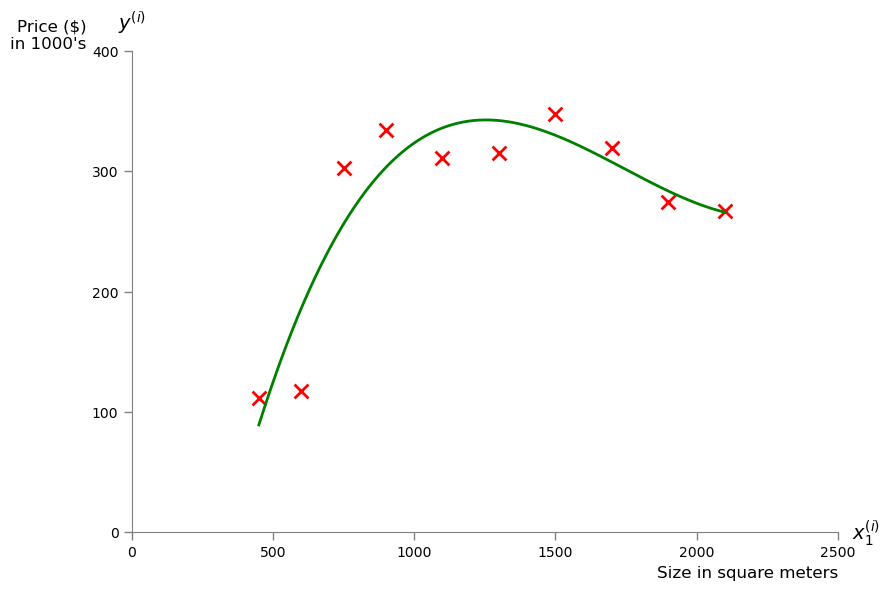

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate synthetic data that roughly matches the image
np.random.seed(42) # for reproducibility

# Feature: Size in mq (x1^(i))
X_size = np.array([450, 600, 750, 900, 1100, 1300, 1500, 1700, 1900, 2100])

# Target: Price ($ in 1000's) (y^(i))
# We create a base curve (e.g., a quadratic or cubic-like curve) and add noise
# This function aims to match the upward curve that flattens out
y_price_base = -0.0001 * (X_size - 1300)**2 + 320  # Inverted parabola for the main shape
y_price_base[X_size < 700] = 0.0005 * (X_size[X_size < 700] - 400)**2 + 100 # Adjust start
y_price = y_price_base + np.random.randn(len(X_size)) * 20 # Add some random noise

# 2. --- THIS IS THE CORRECTED STEP ---
# Instead of hand-tuning, we "fit" a model using numpy.polyfit.
# We will find the best 3rd-degree (cubic) polynomial.
# This is what a real model would do.
model_coefficients = np.polyfit(X_size, y_price, 3)
model_function = np.poly1d(model_coefficients)

# Create the x-axis for the smooth curve
X_fit_curve = np.linspace(X_size.min(), X_size.max(), 500)

# Get the y-values from our "fitted" model function
y_fit_curve = model_function(X_fit_curve)
# --- End of correction ---


# 3. Plot the results
plt.figure(figsize=(9, 6))

# Plot data points as red 'x' marks
plt.scatter(X_size, y_price, color='red', marker='x', s=100, linewidth=2)

# Plot the fitted curve as a green line (using our new curve)
plt.plot(X_fit_curve, y_fit_curve, color='green', linewidth=2)

# 4. Style the plot to match the example image
plt.title('') # No title needed for this style
plt.xlabel('Size in square meters', loc='right', fontsize=12)
plt.ylabel('Price ($)\nin 1000\'s', loc='top', rotation=0, fontsize=12)

# Customizing ticks and limits
plt.xlim(0, 2500)
plt.ylim(0, 400)
plt.xticks(np.arange(0, 2501, 500))
plt.yticks(np.arange(0, 401, 100))

# Customizing tick labels
plt.tick_params(axis='x', length=6, width=1, colors='gray', labelcolor='black', labelsize=10)
plt.tick_params(axis='y', length=6, width=1, colors='gray', labelcolor='black', labelsize=10)

# Removing default spines and adding custom axes for a cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Add x1^(i) and y^(i) labels at the end of the axes manually
plt.text(plt.xlim()[1] * 1.02, plt.ylim()[0] * 0.9, r'$x_1^{(i)}$', ha='left', va='center', fontsize=14)
plt.text(plt.xlim()[0] * 0.9, plt.ylim()[1] * 1.03, r'$y^{(i)}$', ha='center', va='bottom', fontsize=14, rotation=0)

plt.tight_layout()


Other Examples:
* **Market Risk or Stock Price Prediction.** Given a company's historical data ($X$), what will its stock price ($y$) be tomorrow? The output is a number (e.g., \$150.25).
* **Predicting a Student's Score.** Given a student's study hours, past grades, and attendance ($X$), what will their final exam score ($y$) be? The output is a number (e.g., 87.5).

#### 2. Classification (Predicting a Label)

In a **classification** problem, the output variable $y$ that we want to predict is a **discrete category or label**. Visually, the goal of classification is to find a "boundary" that best separates the different labeled groups.

> **Key Question:** "Which one?" or "Is this A or B?"

For example, the plot below illustrates how a classifier learns a "boundary" to separate two different groups of patients, one with a disease (Class 1) and one without (Class 0), based on their age and the result of a blood test.

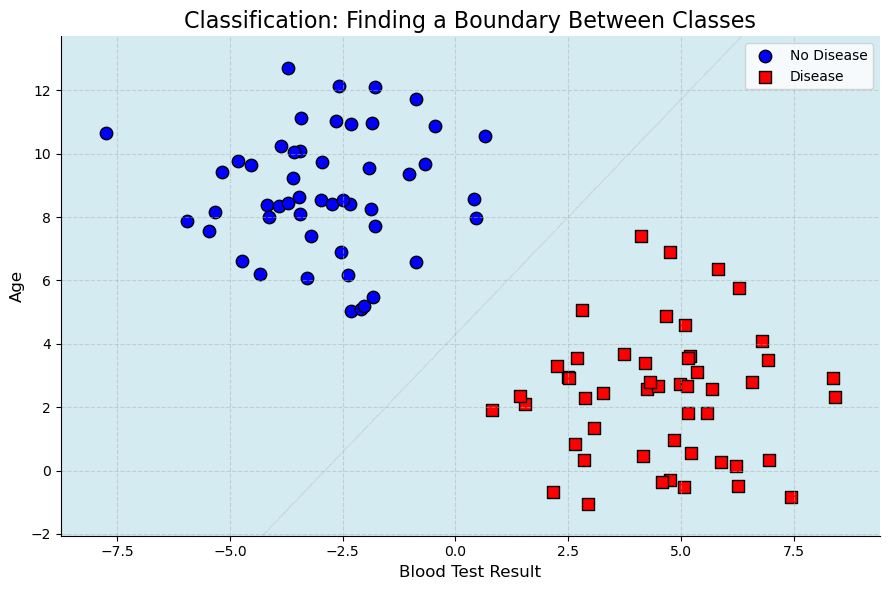

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic data for two classes
# We create two distinct "blobs" of points.
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                  random_state=42, cluster_std=2.0)

# 2. Create and Train the Classification Model
# We use Logistic Regression, a foundational model for classification.
model = LogisticRegression()
model.fit(X, y)

# 3. Create a meshgrid to plot the decision boundary
# This creates a "background" of predictions.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Get predictions for every point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Plot the results
plt.figure(figsize=(9, 6))

# Plot the decision regions (the colored background)
plt.contourf(xx, yy, Z, colors=['lightblue', 'mistyrose'], alpha=0.5)

# Plot the data points
# Class 0 (e.g., "No Disease")
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='blue', marker='o', s=80,
            edgecolor='k', label='No Disease (Class 0)')
# Class 1 (e.g., "Disease")
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color='red', marker='s', s=80,
            edgecolor='k', label='Disease (Class 1)')

# 5. Style the plot
plt.title('Classification: Finding a Boundary Between Classes', fontsize=16)
plt.xlabel('Blood Test Result', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Remove plot borders for a cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

Other examples:
* **Spam Filter (Binary Classification).** Given an email's content ($X$), is it `spam` or `not-spam`? The output $y$ is one of two labels.
* **Medical Diagnosis (Binary Classification).** Given a patient's symptoms and test results ($X$), do they have the `disease` or `no-disease`?
* **Customer Churn (Binary Classification).** Given a customer's usage and support history ($X$), will they `churn` (leave) or `stay` next month?
* **Image Recognition (Multiclass Classification).** Given an image ($X$), is it a `cat`, `dog`, or `bird`? The output $y$ is one of several labels.

### Unsupervised Learning: Learning without an Answer Key

In **unsupervised learning**, our dataset only contains the **input features ($X$)**. We do *not* have a correct answer $y$ to learn from. The goal is not to predict an outcome, but to find **hidden structure, patterns, or groupings** within the data itself.

#### 1. Clustering (Finding Groups)

**Clustering** is the most common unsupervised task. The goal is to automatically group similar data points together into "clusters" based on their features. Visually, the goal of clustering is to discover these "hidden" groups in data that does not have any pre-existing labels.

> **Key Question:** "What are the natural groups in my data?"

For example, let's look at the "Customer Segmentation" problem. A company might have data on its customers, such as their `Age` and their `Spending Score`, but no pre-existing "groups" or labels. The data is **unsupervised**. A clustering algorithm's job is to analyze this unlabeled data and discover the hidden structure. As the plot below illustrates, the algorithm might automatically find three distinct clusters, which a business analyst could then identify as, for instance, **"Young Savers", "Prime Spenders", and "Older Savers"**. The company can then create targeted marketing campaigns for each discovered group.

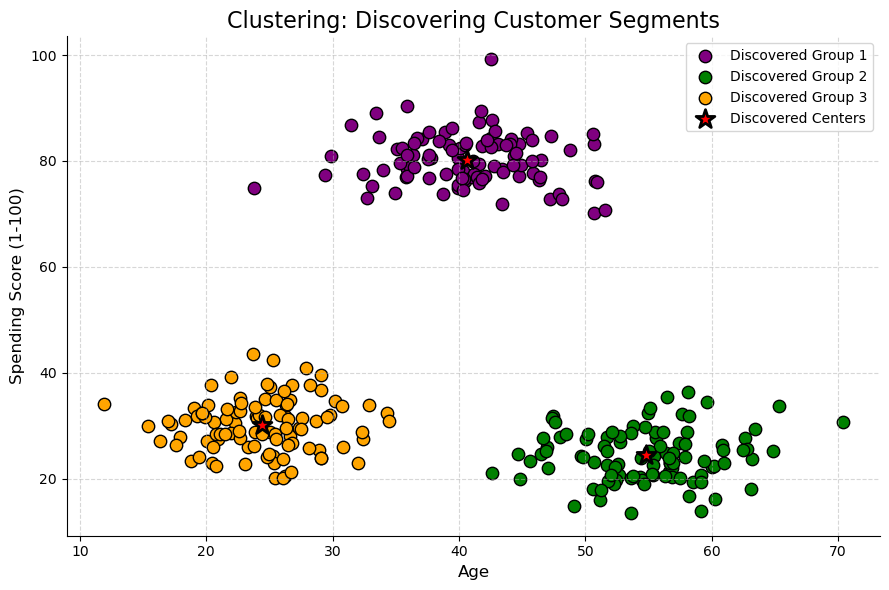

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data WITHOUT labels (this is unsupervised!)
# We'll create data for 3 distinct customer segments based on Age and Spending.

# Center for Cluster 0 ("Young Savers"):       (Age 25, Spending Score 30)
# Center for Cluster 1 ("Prime Spenders"):  (Age 40, Spending Score 80)
# Center for Cluster 2 ("Older Savers"):    (Age 55, Spending Score 25)
centers = [(25, 30), (40, 80), (55, 25)]

# X will be our features [Age, Spending Score]
# We discard the 'y' labels (with '_') because this is unsupervised.
X, _ = make_blobs(n_samples=300, centers=centers, n_features=2,
                  cluster_std=5.0, random_state=42)

# 2. Apply the K-Means clustering algorithm
# We tell KMeans to look for 3 clusters (n_clusters=3).
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# 3. Get the cluster assignments (labels) discovered by the algorithm
labels = kmeans.labels_

# 4. Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# 5. Plot the results
plt.figure(figsize=(9, 6))

# Plot the data points, colored by their ASSIGNED cluster
colors = ['purple', 'green', 'orange']
for i, color in zip(range(kmeans.n_clusters), colors):
    plt.scatter(X[labels == i, 0], X[labels == i, 1],
                s=80, marker='o', c=color, edgecolor='k',
                label=f'Discovered Group {i+1}')

# Plot the cluster centers (the "average" customer in each group)
plt.scatter(centers[:, 0], centers[:, 1],
            s=200, marker='*', c='red', edgecolor='black', linewidth=2,
            label='Discovered Centers', zorder=5) # zorder to ensure stars are on top


# 6. Style the plot with the new story
plt.title('Clustering: Discovering Customer Segments', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Clean up the plot borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

#### 2. Dimensionality Reduction

**Dimensionality Reduction** is the process of reducing the number of features (dimensions) in a dataset, while trying to retain as much of the original information as possible.

Instead of 100 features, we might find 2 or 3 "summary" features (called principal components) that capture most of the original data's variance.

* **Key Question:** "Can I represent my data with fewer features without losing its essential structure?"
* **Why it's useful:**
    1.  **Visualization:** It allows us to plot complex, high-dimensional data (e.g., 50 features) on a 2D or 3D graph.
    2.  **Efficiency:** It makes other machine learning models (like regression or classification) faster and more stable by removing redundant, noisy features.
* **Example: `Principal Component Analysis (PCA)`**.


#### 3. Anomaly Detection

**Anomaly Detection** (or Outlier Detection) is the task of identifying data points that are rare and significantly different from the majority of the data.

This is an unsupervised task because we don't have a pre-labeled list of "anomalies." We just have a large set of mostly "normal" data, and our goal is to find the "odd ones out."

* **Key Question:** "Does this new data point look 'normal' compared to everything else?"
* **Example: `Fraud Detection`**. Given 1,000,000 normal credit card transactions, can we identify the 5 transactions that are fraudulent? Other examples include monitoring for a failing server in a data center or finding defective products on an assembly line.

## Parametric vs. Non-Parametric Models
There are different types of models. A fundamental way to categorize these models is by how they handle their own complexity—specifically, whether their number of parameters is fixed or flexible.

### Parametric Models: The "Fixed" Approach

A **parametric model** is one that makes strong assumptions about the form of the function $f(X)$. It "locks in" its structure *before* it even sees the data.

The defining feature of a parametric model is that it has a **fixed number of parameters**, regardless of the size of the training dataset.

* **How it works:** The model "learns" by finding the best values for its finite set of parameters (e.g., by minimizing empirical risk).
* **Examples:**
    * **Linear Regression:** The model is pre-defined by the equation $h(x) = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$. The *only* things it can learn are the coefficients ($\beta_0, \ldots, \beta_n$). No matter if you have 100 or 100 million data points, the model is still just this set of $\beta$ parameters.
    * **Logistic Regression:** Same as linear, but squashes the output with a logistic function. It still only learns a fixed set of $\beta$ parameters.
    * **Naive Bayes:** Learns a fixed set of probabilities for each feature.

**The Trade-off:**
* **Pros:**
    * **Simpler:** They are easier to understand and interpret ("glass box").
    * **Faster:** They are fast to train.
    * **Less Data:** They don't require as much training data.
* **Cons:**
    * **Constrained:** They are "biased" by their initial assumption (e.g., that the data is linear). If the true relationship is highly complex, a parametric model will fail to capture it.
    * **Risk:** They are prone to **underfitting**.


### Non-Parametric Models: The "Flexible" Approach

A **non-parametric model** is one that makes very few or no assumptions about the form of the true function $f(X)$. It lets the data "speak for itself."

The defining feature of a non-parametric model is that the number of parameters is **not fixed**. The model's structure and complexity **grow as the amount of training data increases**.

* **How it works:** The model "learns" by essentially fitting itself to the training data. The model *is* the data.
* **Examples:**
    * **k-Nearest Neighbors (KNN):** To make a prediction for a new point, the model *literally* has to look at the "k" closest points from the *entire* training set. If your training set doubles, the "model" (the stored data it refers to) doubles.

**The Trade-off:**
* **Pros:**
    * **Flexible:** They can fit a much wider range of functional forms.
    * **Less Bias:** They are not limited by a wrong assumption and can capture the true, complex pattern in the data.
* **Cons:**
    * **More Data:** They require *a lot* more data to learn effectively.
    * **Slower:** They are often much slower to train.
    * **Less Interpretable:** They are often "black boxes."
    * **Risk:** They are highly prone to **overfitting** (memorizing the noise in the data).

### Why This Matters: The Bias-Variance Connection

This choice is the practical embodiment of the **Bias-Variance Tradeoff** that we will discuss next.

* When you choose a **Parametric Model**, you are placing a big bet on your initial assumption (e.g., "the data is linear"). You are deliberately choosing a **high-bias, low-variance** approach.
* When you choose a **Non-Parametric Model**, you are assuming you have enough data for the true pattern to reveal itself. You are choosing a **low-bias, high-variance** approach.

The next challenge, which we will cover, is how to *control* the complexity of these models to find the perfect "sweet spot" between underfitting and overfitting.

## The "Learning" Principle

Now that we have distinguished between Supervised (learning with an answer key) and Unsupervised (learning without one) problems, let's build a formal framework.

For the rest of this discussion, we will focus **exclusively on the Supervised Learning problem**, as the concepts of "learning" and "prediction error" are most formally defined there.

### Formal Problem Formulation

Let $\mathcal{X}$ and $\mathcal{Y}$ be two spaces of objects. We can see them as the sample spaces of two random variables $X$ and $Y$, with $x \in \mathcal{X}$ and $y \in \mathcal{Y}$ being two realizations of the random variables: $X=x$ and $Y=y$.

As defined in the previous section, the goal of predictive modeling is to find a function (or **hypothesis**) $h$:

$$h : \mathcal{X} \to \mathcal{Y}$$

which outputs an object $\hat{y} \in \mathcal{Y}$, given an object $x \in \mathcal{X}$. We use the symbol $y$ to refer to the **true value** (or **ground truth**) associated with $x$, while **$\hat y$ will represent the prediction** obtained using our function $h$:

$$\hat y = h(x)$$

#### Example 1: Medical Diagnosis
We can imagine $\mathcal{X}=\Re^m$ and $\mathcal{Y}=\{0,1\}$, with $\mathbf{x} \in \Re^m$ being a numerical vector representing the results of different blood tests, while $y \in \{0,1\}$ is a response variable indicating whether the subject has ($1$) or does not have ($0$) a given disease. Finding an appropriate $h$ will allow us to predict $\hat y = h(\mathbf{x})$.

#### Example 2: Simple Spam Filter
We want to build a **spam filter** where $\mathcal{X}$ is the set of all possible emails and $\mathcal{Y}=\{0,1\}$. Let $f(x)$ be a function that counts the number of orthographical mistakes in an email $x$. We can define our hypothesis $h$ as:

$$h(x) = \begin{cases} 1 & \text{ if } f(x)>\theta \\ 0 & \text{otherwise} \end{cases}$$

### Parameters: What the Model Learns

The function $h$ is rarely defined explicitly. Instead, it is a **parametric model**, and the "learning" process consists of finding the best values for its **parameters**.

The threshold $\theta$ in Example 2 is a perfect, simple example of a **parameter**. It is a "knob" that the learning algorithm must tune. A different value for $\theta$ creates a different hypothesis function $h$.

A more complex model, like a linear regressor (which we will see soon), will have different parameters (e.g., coefficients $\beta_0, \beta_1, \ldots, \beta_n$). The set of all possible functions $h$ that we can create by changing the parameters is called the **class of functions (or hypothesis space) $\mathcal{H}$**.

The question is: how do we find the *best* parameters?

### The Learning Process: Statistical Learning and Risk

To find the "best" $h$ from our hypothesis space $\mathcal{H}$, we need a way to measure how "good" it is. We do this by defining a **loss (or cost) function**, $L(\hat y, y)$, which measures the penalty for making a prediction $\hat y$ when the true value is $y$.

$$L(\hat y, y)$$

Ideally, we want to find the function $h^*$ that has the lowest possible loss *on average* over *all possible data*, not just the data we have. This "true" average loss is called the **Risk $R(h)$**, defined as the **expected loss** under the true (but unknown) joint probability distribution $P(X,Y)$:

$$R(h) = E_{(x,y) \sim P(X,Y)}[L(h(x),y)]$$

The goal of **statistical learning** is to solve this optimization problem:

$$h^* = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R(h)$$

### Empirical Risk Minimization (ERM): The Practical Method

There is a major problem: we can almost never compute the true Risk $R(h)$ because we do not know the true distribution $P(X,Y)$.

However, we *do* have a dataset, often called a **Training Set (TR)**, of $N$ examples, which we assume is a representative sample from $P(X,Y)$:

$$\text{TR}=\{(x_i,y_i)\}_{i=1}^N$$

By the **law of large numbers**, we can get a good *estimate* of the true Risk by simply calculating the *average* loss over our training set. This is called the **Empirical Risk $R_{emp}(h)$**:

$$R_{emp}(h) = \frac{1}{N}\sum_{i=1}^N L(h(x_i),y_i)$$

This leads to the central "learning" principle of machine learning: the **Empirical Risk Minimization (ERM)** principle. It states that since we cannot find the $h$ that minimizes the *true* Risk, the best we can do is choose the hypothesis $\hat h$ that minimizes the *empirical* risk:

$$\hat h = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R_{emp}(h)$$

A **learning algorithm** is simply an optimization algorithm that solves this problem: it takes the training set TR and finds the parameters for $\hat h$ that minimize the empirical risk.

### Model Capacity

Before moving on, we need to define the crucial concept of model capacity. In simple terms, a model's capacity is its **flexibility** or **complexity**.

Formally, capacity is related to the **size and richness of the hypothesis space $\mathcal{H}$** that the model can choose from.

* **Low Capacity Model:**
    * Has a **small, constrained** hypothesis space $\mathcal{H}$.
    * It can only represent a limited set of simple functions.
    * **Example:** Modeling our hypothesis function with a simple line. It can *only* learn linear functions ($h(x) = \beta_0 + \beta_1 x$), no matter what the data looks like. It is "biased" toward simplicity.
    * **Risk:** This model may be too simple to capture the true underlying pattern.

* **High Capacity Model:**
    * Has a **large, rich** hypothesis space $\mathcal{H}$.
    * It can represent a huge set of very complex functions.
    * **Example:** A 10th-degree polynomial. It can learn extremely "wiggly" functions that can fit almost any set of points perfectly.
    * **Risk:** This model is so flexible that it can easily fit the random *noise* in the training data, not just the signal. It might be very accurate for the data it has been trained on, but not for the general distribution of the data.

## Assessing Model Accuracy
Once we have used Empirical Risk Minimization (ERM) to "learn" a model $\hat{h}$, we need to know how good it is. A model that perfectly fits our training data (i.e., has a low $R_{emp}$) is not necessarily a good model. Our ultimate goal is a model that **generalizes** well—that is, one that makes accurate predictions on new, unseen data.

To do this, we must first define *how* to measure performance.

### Measuring the quality of fit
To measure the "quality of fit" or performance of a model, we need a concrete **evaluation metric**. This metric is sometimes the same as the **loss function** $L(\hat y, y)$ we used in the ERM principle. It quantifies the cost or error of our predictions. The specific metric we choose depends on the problem (e.g., regression vs. classification).

For **regression problems**, the most common metric is the **Mean Squared Error (MSE)**.

If we choose our loss function $L(y, \hat{y}) = (y - \hat{y})^2$, then the **Mean Squared Error (MSE)** is precisely the **Empirical Risk** we are trying to minimize:

$$R_{emp}(h) = \frac{1}{N}\sum_{i=1}^N (y_i - h(x_i))^2 = \text{MSE}$$

This leads to a critical question: is a model with a very low MSE on our *training data* a good model? Not necessarily.

### Overfitting and Underfitting
This brings us to the central challenge of predictive modeling. The ERM principle tells us to find the model $\hat h$ that *best* fits the training data. But what is the risk of doing this?

#### Overfitting

This is the single biggest "pitfall" in machine learning. It happens when a model becomes *too* complex and becomes *too good* at minimizing the empirical risk. It ends up "memorizing" the training data, including its random noise and quirks. 

As an example, consider the following model:

$$\hat h(x) = y \text{ s.t. } (x,y) \in \text{TR}$$

The hypothesis $\hat h$ defined above will lead to an empirical risk equal to $0$ as long as the loss function is defined in such a way that $L(y,y)=0$. Indeed:

$$R_{emp}(\hat{h}(x)) = \frac{1}{N}\sum_{i=1}^N L(y,y) = 0$$

However, the function above will not be defined for any value:

$$x' \in \mathcal{X} \text{ s.t. } (x',y) \notin \text{ TR } \forall y \in \mathcal{Y}$$

Since **we expect the training set to be a sample from the distribution $P(X,Y)$, we expect such values $x'$ to exist** (otherwise the training *is* the population, which is in general not true).

#### Underfitting

The phenomenon of overfitting is often related to the **capacity of the model**. A model with a **large capacity** can represent very complex functions $h$ and result in overfitting, while a model with a **small capacity** can represent relatively simple functions $h$, making overfitting harder, but possibly resulting in an **underfitting model**, i.e., a model which is too simple, and as a result cannot reach a low empirical risk.

This is best seen with the example below:

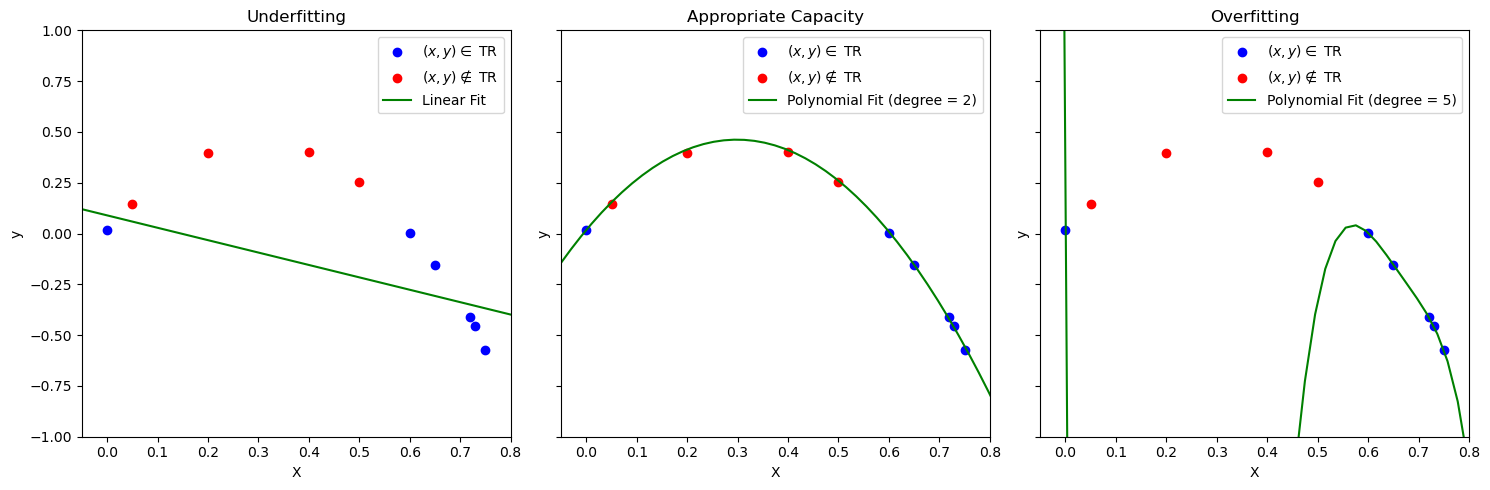

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate random data
np.random.seed(0)
n=10
#X_train = np.random.rand(n, 1)
X_train = np.array([0,0.05,0.2,0.4,0.5,0.6,0.65,0.72,0.73,0.75]).reshape(-1,1)
idx_train = np.array([0,5,6,7,8,9])
idx_test = np.array([1,2,3,4])
X_test = X_train[idx_test]
X_train = X_train[idx_train]
#y = 1 + 2 * X - 5*X**3 + 3*X**4 + np.random.randn(n, 1)
f = lambda x: 3*x - 5*x**2 + np.random.randn(x.shape[0],1)*0.01
y_train = f(X_train)
y_test = f(X_test)

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up subplot
degrees = [1, 2, 5]
_, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharex=True, sharey=True)

txt = ["Underfitting", "Appropriate Capacity", "Overfitting"]

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    #print(model.score(X_poly_train, y_train))

    # Plot training data
    axs[i].scatter(X_train, y_train, color='blue', label='$(x,y) \\in$ TR')

    # Plot test data
    axs[i].scatter(X_test, y_test, color='red', label='$(x,y) \\notin$ TR')

    # Plot polynomial fit
    x_range = np.linspace(-1, 1, 100).reshape(-1, 1)
    x_range_poly = poly_features.transform(x_range)
    y_pred = model.predict(x_range_poly)
    if i==0:
        axs[i].plot(x_range, y_pred, color='green', label=f'Linear Fit')
    else:
        axs[i].plot(x_range, y_pred, color='green', label=f'Polynomial Fit (degree = {degree})')

    axs[i].set_title(txt[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    plt.xlim([-0.05,0.8])
    plt.ylim(-1,1)
    axs[i].legend()

plt.tight_layout()
plt.show()


The example shows the fit of three functions to the data. As can be noted:

* A line will lead to **underfitting**. In this case, the model is too simple to model the data well, so the empirical risk will be large;
* A polynomial of high degree $5$ (right) will minimize the empirical risk but find a complex model which will not describe well data which has not been seen at training time. This is a case of **overfitting**. The model is trying to model the idiosyncrasies of the training set (which can be noisy) finding a solution which will work only on the data at hand;
* An appropriate degree (center) will lead to a model with an appropriate capacity. The empirical risk is minimized and the solution also works with unseen data.

> Note that this is another instance of the **bias-variance** tradeoff. Complex models (right) have a large variance and a large bias: small variations of the training set are modeled and can lead to wrong solutions. Models that are too simple  (left) have a low variance, but can still have a large bias (the model is too simple and the solution is not good). Choosing an appropriate capacity (in this case by choosing an appropriate polynomial degree) leads to a good trade-off between variance and bias.

### The Bias-Variance Tradeoff
This choice of capacity of a model introduces one of the most important theoretical concepts in machine learning: the **Bias-Variance Tradeoff**.

To understand this, let's recall our goal. We are trying to build a model, $\hat{f}$, that best estimates the true (but unknown) function $f$ from our general formula, $Y = f(X) + \epsilon$.

We just defined our metric for success in regression: the **Mean Squared Error (MSE)**. We want to find a model $\hat{f}$ that has the lowest possible MSE, *especially on new, unseen test data*.

It can be mathematically proven that the **expected test MSE** at a given point $x_0$ can be decomposed into three fundamental quantities:

$$E[(y_0 - \hat{f}(x_0))^2] = [\text{Bias}(\hat{f}(x_0))]^2 + \text{Var}(\hat{f}(x_0)) + \text{Var}(\epsilon)$$

This formula is the key to understanding model performance. It tells us that the total expected error of our model is the sum of three parts:

1.  **The Squared Bias ($[\text{Bias}(\hat{f}(x_0))]^2$)**
    * This is the error from **"Underfitting"**.
    * **Formally**, Bias is the error introduced by approximating a real-life, complex function $f$ with a much simpler model $\hat{f}$. It's the difference between our model's *average* prediction and the *true* value.
    * **Conceptually**, a high-bias model is "stubborn" and "stuck" in its simple assumptions. **Low-capacity** models (like simple linear regression) have **High Bias**. They miss the true pattern and have a high error on *both* the training and test sets.

2.  **The Variance ($\text{Var}(\hat{f}(x_0))$)**
    * This is the error from **"Overfitting"**.
    * **Formally**, Variance refers to the amount by which our model $\hat{f}$ would change if we estimated it using a *different* training dataset.
    * **Conceptually**, a high-variance model is "nervous" or "unstable." It is *too* sensitive to the specific training data it saw. **High-capacity** models (like a high-degree polynomial) have **High Variance**. They fit the training data's noise perfectly (low training error) but fail to generalize to the test set (high test error).

3.  **The Irreducible Error ($\text{Var}(\epsilon)$)**
    * This is the variance of the error term $\epsilon$ from our original formula $Y = f(X) + \epsilon$.
    * **Conceptually**, this is the noise that exists in the real-world data itself. It's the part of the error that cannot be reduced by *any* model, no matter how good it is. It represents the upper limit on our model's accuracy.

#### The Tradeoff
This decomposition shows the fundamental tradeoff:

* As we **increase** model capacity (e.g., add more polynomial terms):
    * The model becomes more flexible, so **Bias decreases** (good!).
    * The model becomes more sensitive to the training data, so **Variance increases** (bad!).
* As we **decrease** model capacity (e.g., simplify the model):
    * The model's assumptions become too strong, so **Bias increases** (bad!).
    * The model becomes more stable and less sensitive to noise, so **Variance decreases** (good!).

Our goal as data scientists is not to minimize bias or variance alone, but to find the **"sweet spot"**—the optimal model capacity that minimizes the **total error**.

This leads to the next logical question: How do we *find* this sweet spot? In practice, there are different ways to find this trade-off. In the example above, the degree of the polynomial can be used to reduce the capacity of the model. Another approach is to use **regularization techniques**, which we will see later in the course.

This is shown in the figure below:

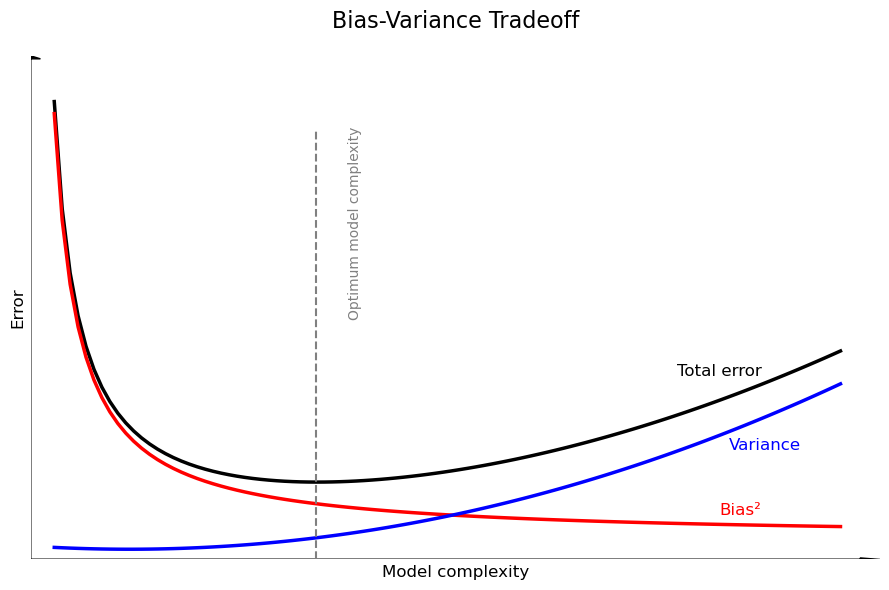

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Create the X-axis: Model Complexity
model_complexity = np.linspace(0.1, 20, 100) # Start from 0.1 to avoid division by zero

# 2. Simulate the error curves to mimic the provided image
# Bias^2: Decreases as complexity increases (hyperbolic-like decay)
bias_squared = 25 / (model_complexity + 0.5) + 2

# Variance: Increases as complexity increases (quadratic-like growth)
variance = 0.05 * (model_complexity - 2)**2 + 1 # Adjusted to cross around complexity 6-8

# Total Error: The sum of Bias^2 and Variance (no explicit irreducible error for this visual)
total_error = bias_squared + variance

# 3. Find the "optimal" complexity (minimum of the total error)
optimal_complexity_idx = np.argmin(total_error)
optimal_complexity = model_complexity[optimal_complexity_idx]
min_total_error_value = total_error[optimal_complexity_idx]

# 4. Create the plot
plt.figure(figsize=(9, 6))

# Plot the curves with specific colors
plt.plot(model_complexity, total_error, color='black', linewidth=2.5, label='Total Error')
plt.plot(model_complexity, bias_squared, color='red', linewidth=2.5, label='Bias²')
plt.plot(model_complexity, variance, color='blue', linewidth=2.5, label='Variance')

# 5. Add "Optimum model complexity" dashed line
plt.axvline(x=optimal_complexity, color='gray', linestyle='--', linewidth=1.5, ymax=0.85)
plt.text(optimal_complexity + 0.8, plt.ylim()[1] * 0.7, 'Optimum model complexity',
         rotation=90, va='center', ha='left', color='gray', fontsize=10)


# 6. Add labels directly on the curves
# Total Error label
plt.text(model_complexity[-1] * 0.9, total_error[-1] * 0.9, 'Total error', color='black', ha='right', va='center', fontsize=12)
# Variance label
plt.text(model_complexity[-1] * 0.95, variance[-1] * 0.65, 'Variance', color='blue', ha='right', va='center', fontsize=12)
# Bias^2 label (positioned to avoid overlap)
plt.text(model_complexity[-1] * 0.9, bias_squared[-1] * 1.5, 'Bias²', color='red', ha='right', va='center', fontsize=12)


# 7. Style the plot
plt.title('Bias-Variance Tradeoff', fontsize=16, pad=20)
plt.xlabel('Model complexity', fontsize=12)
plt.ylabel('Error', fontsize=12)

# Remove the legend as labels are directly on curves
# plt.legend()

# Clean up axes and add arrows
plt.ylim(bottom=0, top=total_error.max() * 1.1)
plt.xlim(left=-0.5, right=21) # Extend x-axis slightly for arrows

# Add arrows to axes
plt.arrow(plt.xlim()[0], plt.ylim()[0], plt.xlim()[1]-plt.xlim()[0], 0, color='black', head_width=0.3, head_length=0.5, length_includes_head=True)
plt.arrow(plt.xlim()[0], plt.ylim()[0], 0, plt.ylim()[1]-plt.ylim()[0], color='black', head_width=0.5, head_length=0.3, length_includes_head=True)

# Remove default spines and ticks for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False) # Hide bottom spine for custom arrow
plt.gca().spines['left'].set_visible(False)   # Hide left spine for custom arrow
plt.xticks([])
plt.yticks([])


plt.tight_layout()


### Parameters vs. Hyperparameters

To control model capacity and prevent overfitting, we must distinguish between two types of parameters:

1.  **Model Parameters:** These are the values the model *learns* from the data during the training process (i.e., through Empirical Risk Minimization). They are *internal* to the model and are the direct output of the learning algorithm.
    * **Examples:** The coefficients $\beta_0, \beta_1, \ldots$ in a linear regression; the weights in a neural network.

2.  **Hyperparameters:** These are the configuration settings for the learning algorithm itself. They are *external* to the model and must be set *before* the training process begins. They act as "knobs" that we use to control the model's capacity and the learning process.
    * **Examples:** The degree `k` in a polynomial regression (which directly controls capacity); the $\lambda$ regularization parameter in Ridge or Lasso regression (which we will see later); the number of clusters `k` in K-Means clustering.

**The central challenge of model selection is this:** The learning algorithm (ERM) can find the best *model parameters* for a *given* set of hyperparameters, but it cannot choose the best *hyperparameters* for you.

For example, ERM can find the best 10th-degree polynomial, and it can find the best 2nd-degree polynomial. But it cannot tell you whether the 10th-degree or the 2nd-degree polynomial is the better *choice*. Choosing this `k` (the hyperparameter) is our job, and it's how we find the sweet spot in the bias-variance tradeoff.

## How Do We Find the Best Model? (Model Selection)

We have established that our central challenge is the bias-variance tradeoff. We must find a model with the "sweet spot" of capacity to avoid both underfitting (high bias) and overfitting (high variance).

The process of finding this optimal model is called **model selection**. The method we use depends directly on our primary goal: **Understanding** or **Predicting**.

### Approach 1: Statistical Selection (for Understanding)

When our main goal is **inference** (the "glass box" approach), we select a model based on its ability to best explain the data we have, often favoring simplicity.

This approach typically uses the **entire dataset** at once. We are not trying to predict the "future," but to find the most trustworthy explanation for the data we've observed.

We use statistical measures that balance model fit with model complexity:
* **p-values:** We test the significance of each variable and may remove those with high p-values (i.e., those that are likely just noise).
* **Adjusted R²:** This metric measures goodness-of-fit but penalizes the model for having extra variables that don't add real explanatory power.

### Approach 2: Predictive Selection (for Predicting)

When our main goal is **prediction** (the "black box" approach), our selection criteria change entirely. We no longer care about p-values. We only care about one thing: performance on unseen data.

> **The Golden Rule of Predictive Modeling:** The performance of a model on the data it was trained on is *irrelevant*. The *only* measure that matters is its performance on new, unseen data.

We must find a way to *measure* a model's performance on data it has never seen. Since we don't have a time machine, we simulate the future by splitting our existing data.

This is often needed when models are so complex that it is hard to even compute p-values or perform statistical tests.

There are a series of empirical approaches in this category, which we explore in the next sections.

However, before to proceed, we should point out that, while we could evaluate the performance of a model with the **empirical risk**, in practice, it is common to use **performance measures** (the higher the better) or **error measures** (the lower the better) which may be different from the **loss function chosen to train the algorithm**. This is due to the fact that loss functions often need to have some properties to facilitate learning, so they can represent an **approximation of or a deviation from our true objective measure of performance**. We will see more in details the main performance measures later, but for the moment we will note that we will evaluate models using a given performance measure:

$$p: \mathcal{Y}^N \times \mathcal{Y}^N \to \Re$$

where $Y=\{y_i | (x_i,y_i) \in S \}_{i=1}^N$ is a set of ground truth values from a set of data $S$ and $\hat Y = \{h(x_i) | (x_i,y_i) \in S \}_{i=1}^N$ is the set of corresponding predictions. Note that, given the definition above, the empirical risk can be seen as a performance measure, but we need not restrict to the empirical risk to evaluate predictive models.

#### Holdout Validation or Single Split
The simplest form of cross-validation is the holdout test. In this case, the initial set of data is split into two different sets: a training set, which will be used to optimize the model (e.g., with empirical risk minimization) and a test set, which is used to evaluate the performance of the model. The act of optimizing the model on the training set is often called **training**, while the act of evaluating the performance of the model on the test set is called **testing**. This approach **pretends that the test data is not available at training time and only uses it to evaluate performance**. 

The **rule number one** when using this technique is **to avoid in any way to choose any characteristic of the model based on the training data**. Indeed, if we did so, we could end up in some form of unmeasurable overfitting. To make sure that both the training and test set are i.i.d., before the split, the data is **randomly shuffled**.

Also, since training data is usually precious and datasets are often not large enough, it is common to split the data asymmetrically, choosing $70-80\%$ of the data for training and $20-30\%$ of the data for testing.

The figure below illustrates the splitting process:

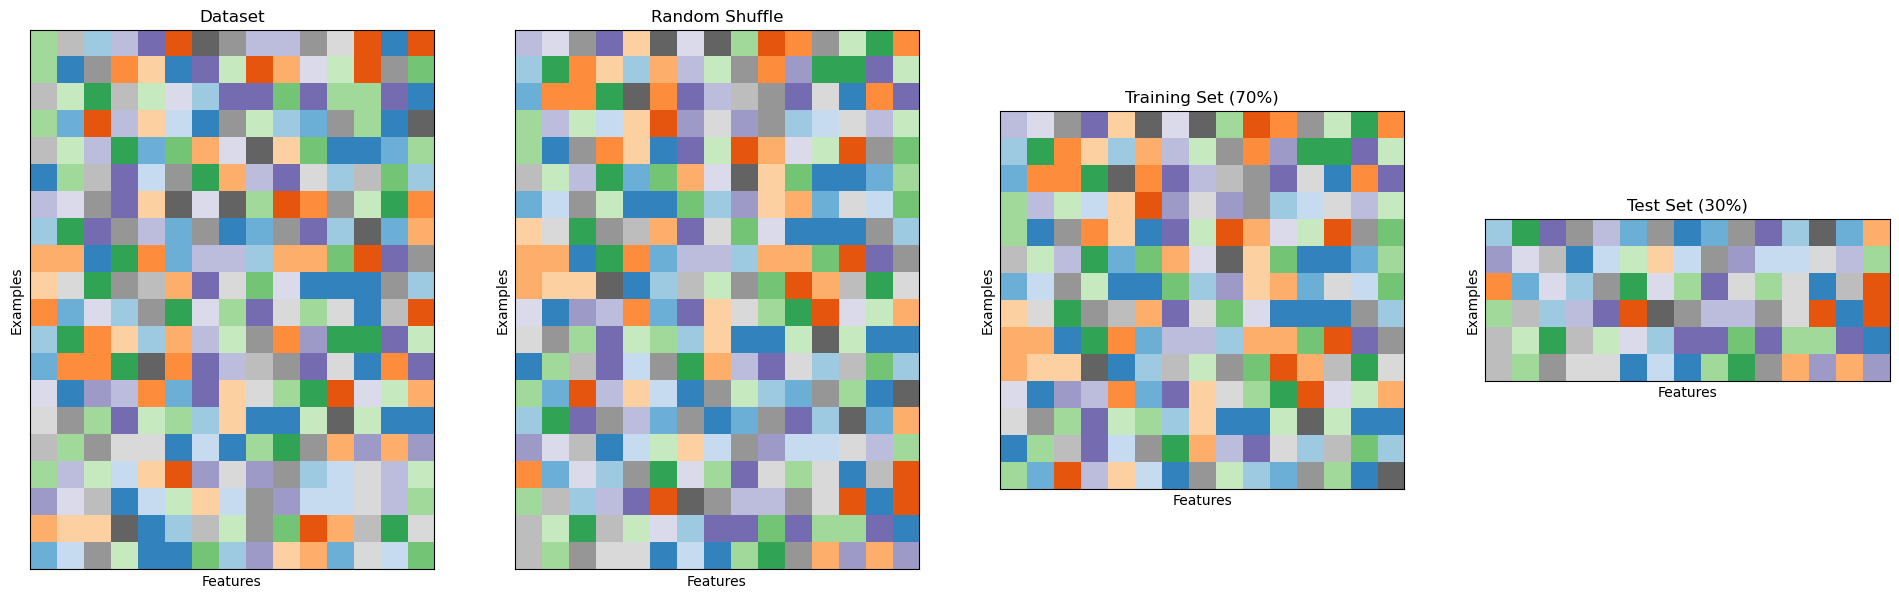

In [41]:
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(42)
n = 20
d = 15
data = np.random.randint(0,100,(n,d))
idx = np.random.permutation(n)
data_shuffled = data[idx]

train = data_shuffled[:int(n*0.7)]
test = data_shuffled[int(n*0.7):]

_, axs = plt.subplots(nrows=1, ncols=4, figsize=(24,8))
axs[0].imshow(data, cmap='tab20c', interpolation='none')
#axs[0].axis('off')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Examples')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title('Dataset')

axs[1].imshow(data_shuffled, cmap='tab20c', interpolation='none')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Examples')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Random Shuffle')

axs[2].imshow(train, cmap='tab20c', interpolation='none')
axs[2].set_title('Training Set (70%)')
axs[2].set_xlabel('Features')
axs[2].set_ylabel('Examples')
axs[2].set_xticks([])
axs[2].set_yticks([])

axs[3].imshow(test, cmap='tab20c', interpolation='none')
axs[3].set_title('Test Set (30%)')
axs[3].set_xlabel('Features')
axs[3].set_ylabel('Examples')
axs[3].set_xticks([])
axs[3].set_yticks([])
plt.show()

### K-Fold Cross-Validation
When the dataset is very small, we may not want to sacrifice a part of it for testing only as this may lead to a biased model. Also, we should note that a small test set could lead to a biased estimation of the model performance. In these cases, rather than randomly splitting the data into two parts, we randomly split it into $K$ different parts, which will be called **folds**.

We then perform training and testing $K$ times, each time using fold $i$ as the test set, and the remaining folds as the training set. The final model performance is obtained by averaging the performance scores computed in each iteration. Note that the obtained performance is unbiased, as each number in the final average is computed on data which has not been seen during training.

The figure below illustrates the case of a 4-fold cross-validation.

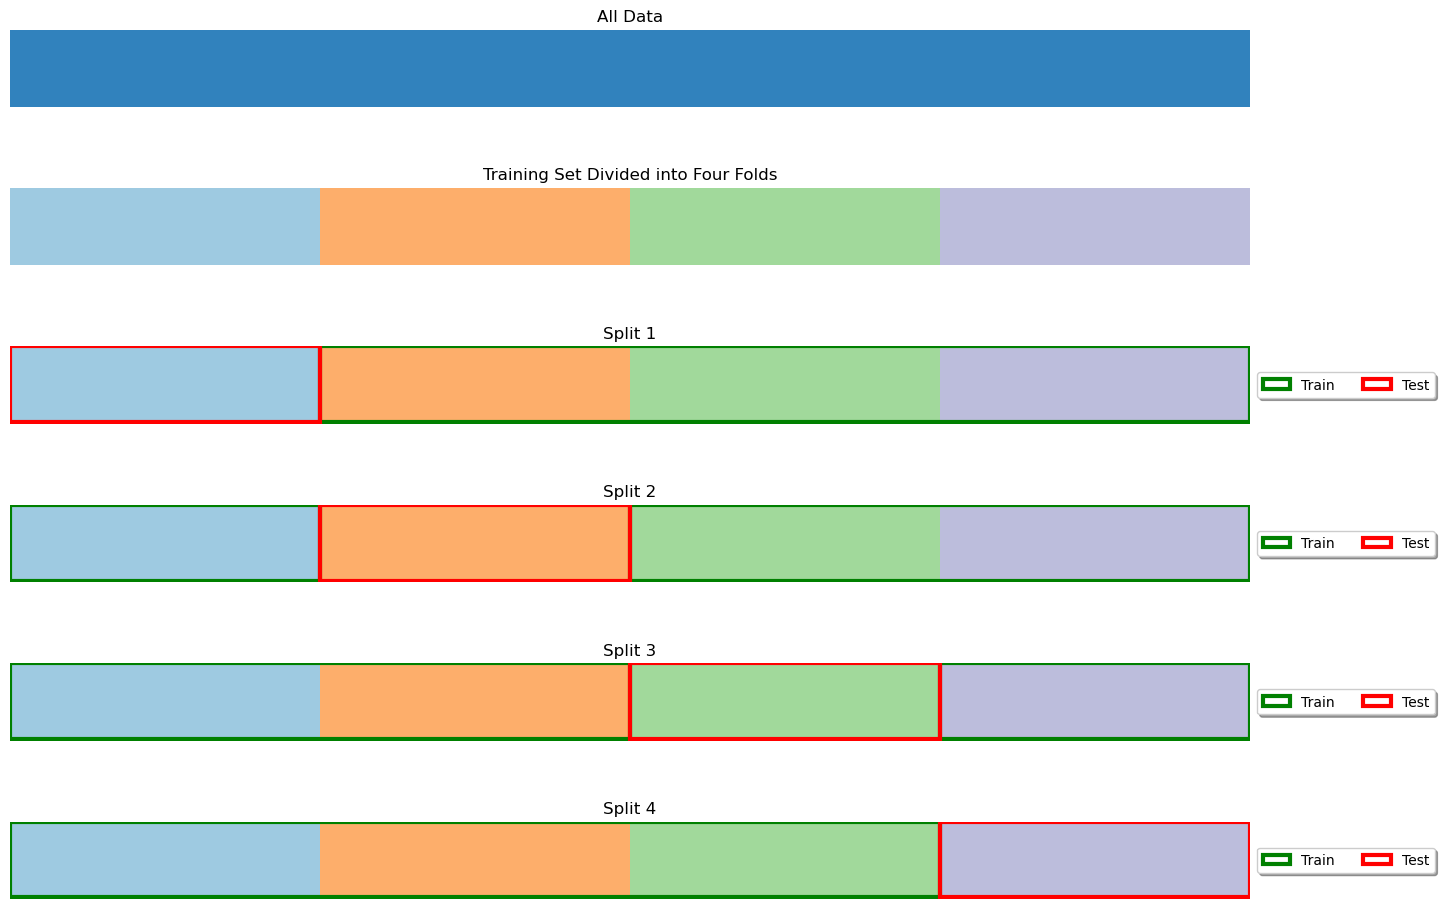

In [42]:
data=np.zeros((1,20))

train_test = data.copy()
train_test[:,16:]=7
train_test = train_test[:,:16]

crossval = train_test.copy()[:,:16]
for c in range(4):
    crossval[:,c*4:(c+1)*4]=c*2+1


_, axs = plt.subplots(nrows=6, ncols=1, figsize=(16,12), sharex=True)

axs[0].imshow(train_test, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[0].axis('off')
axs[0].set_title('All Data')

axs[1].axis('off')
axs[1].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[1].set_title('Training Set Divided into Four Folds')

axs[2].axis('off')
axs[2].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[2].add_patch(plt.Rectangle((3.5,-0.5),12,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[2].add_patch(plt.Rectangle((-0.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[2].set_title('Split 1')

axs[3].axis('off')
axs[3].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[3].add_patch(plt.Rectangle((-0.5,-0.5),4,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[3].add_patch(plt.Rectangle((7.5,-0.5),8,0.98, edgecolor='green', facecolor='none',linewidth=3))
axs[3].add_patch(plt.Rectangle((3.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[3].set_title('Split 2')

axs[4].axis('off')
axs[4].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[4].add_patch(plt.Rectangle((-0.5,-0.5),8,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[4].add_patch(plt.Rectangle((11.5,-0.5),4,0.98, edgecolor='green', facecolor='none',linewidth=3))
axs[4].add_patch(plt.Rectangle((7.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[4].set_title('Split 3')

axs[5].axis('off')
axs[5].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[5].add_patch(plt.Rectangle((-0.5,-0.5),12,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[5].add_patch(plt.Rectangle((11.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[5].set_title('Split 4')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[4].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)


axs[5].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

plt.show()

The K-Fold cross validation has the advantage of allowing to validate the model without throwing away a significant part of the data, but it is practically feasible only when the training procedure is not too computationally expensive. Indeed, if training a model takes one week, a K-Fold validation will typically require four weeks.

### Leave-One-Out Cross-Validation
In leave-one-out cross-validation, the validation stage is performed in $N$ iterations, where $N$ is the number of elements in the dataset. At the $i^{th}$ iteration, the model is trained on all data points except $(x_i,y_i)$ and tested on $(x_i,y_i)$. The final performance is obtained by averaging the performance scores obtained at each iterations. Note that this is the same as K-Fold cross-validation with $K=N$. The figure below illustrates the process:

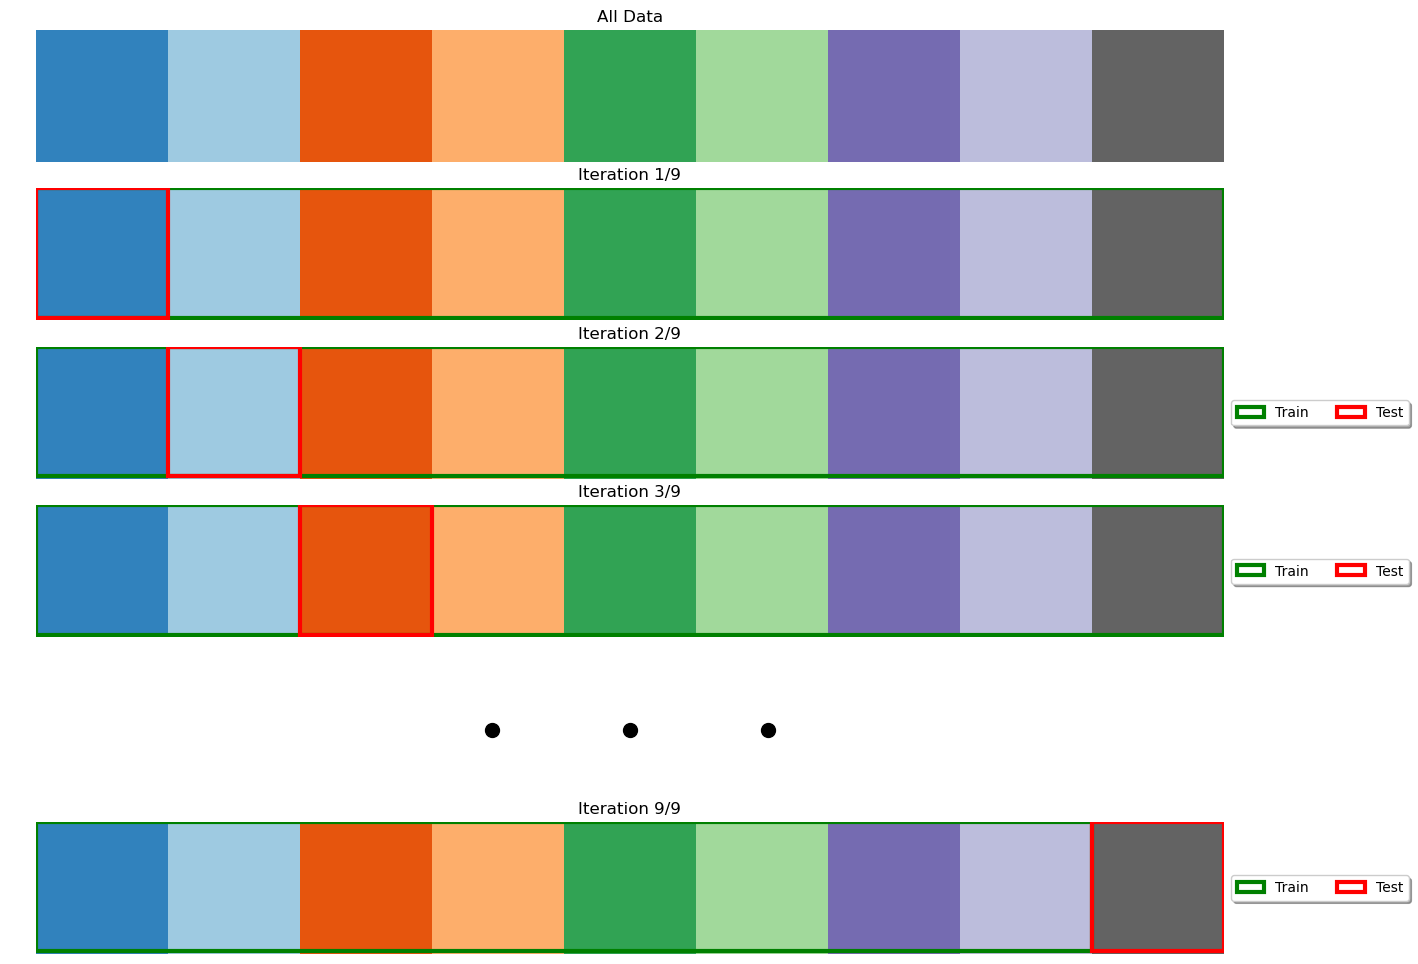

In [43]:
data=np.zeros((1,9))

train_test = data.copy()

crossval = train_test.copy()[:,:16]
for c in range(16):
    crossval[:,c:(c+1)]=c


_, axs = plt.subplots(nrows=6, ncols=1, figsize=(16,12), sharex=True)

axs[0].axis('off')
axs[0].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[0].set_title('All Data')

axs[1].axis('off')
axs[1].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[1].add_patch(plt.Rectangle((-0.5,-0.5),9,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[1].add_patch(plt.Rectangle((-0.5,-0.5),1,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[1].set_title('Iteration 1/9')

axs[2].axis('off')
axs[2].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[2].add_patch(plt.Rectangle((-0.5,-0.5),9,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[2].add_patch(plt.Rectangle((0.5,-0.5),1,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[2].set_title('Iteration 2/9')

axs[3].axis('off')
axs[3].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[3].add_patch(plt.Rectangle((-0.5,-0.5),9,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[3].add_patch(plt.Rectangle((1.5,-0.5),1,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[3].set_title('Iteration 3/9')

axs[4].axis('off')
axs[4].plot(np.array([3,4,5]),np.array([0,0,0]),'k.', markersize=20)

axs[5].axis('off')
axs[5].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[5].add_patch(plt.Rectangle((-0.5,-0.5),8,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[5].add_patch(plt.Rectangle((7.5,-0.5),1,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Test'))
axs[5].set_title('Iteration 9/9')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)


axs[5].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

plt.show()

This approach is useful when the dataset is extremely small, but, similarly to K-Fold cross-validation, it can increase the computation time by a large margin.

### Model Selection and Hyperparameter Optimization
Many algorithms have some parameters which are not explicitly part of the final model $h$, but they need to be set in order to solve the optimization problem. **For example, in a ridge or lasso regressor, the parameter $\lambda$ is used to control the amount of regularization during the learning process, however, the final parameter is not part of the model and is not automatically found during the optimization process**.

Hyperparameters are usually found using grid searches: we train models using different values of the hyperparameters and choose the model which performs best. However, **caution should be taken when hyperparameters are selected with grid search**.

Recall that **we are not allowed to make any choice on the final model using the test set**. Indeed, if we did so, we may incur in a form of overfitting which we would not be able to measure. For instance, we can choose a given parameter which works well only for that specific test set. How can we be sure that performance will be good when new data is analyzed?

To avoid this problem, we should work with three different sets of data: a **training set**, a **validation set**, and a **test set**. We will use the training set to train the model, the validation set to choose the hyperparameters and the test set to test the final performance. This is done by training different models on the test set, choosing the hyperparameter values leading to best values on the validation set, and then re-training the model on the training set (or on the union of training and validation set) to final test on the test set.

The most common scheme is to use a fixed split with a $60:20:20$ ratio, as shown in the following:

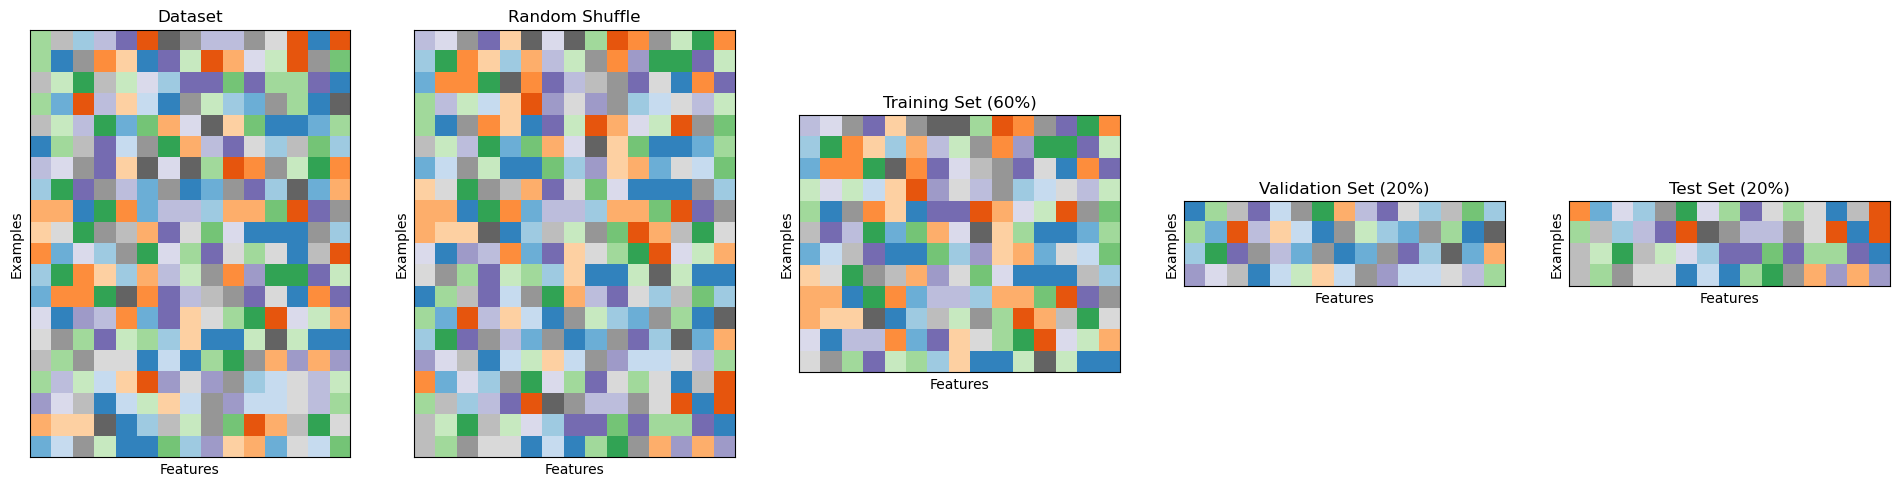

In [44]:
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(42)
n = 20
d = 15
data = np.random.randint(0,100,(n,d))
idx = np.random.permutation(n)
data_shuffled = data[idx]

train = data_shuffled[:int(n*0.6)]
val = data_shuffled[int(n*0.6):int(n*0.8)]
test = data_shuffled[int(n*0.8):]

_, axs = plt.subplots(nrows=1, ncols=5, figsize=(24,8))
axs[0].imshow(data, cmap='tab20c', interpolation='none')
#axs[0].axis('off')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Examples')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title('Dataset')

axs[1].imshow(data_shuffled, cmap='tab20c', interpolation='none')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Examples')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Random Shuffle')

axs[2].imshow(train, cmap='tab20c', interpolation='none')
axs[2].set_title('Training Set (60%)')
axs[2].set_xlabel('Features')
axs[2].set_ylabel('Examples')
axs[2].set_xticks([])
axs[2].set_yticks([])

axs[3].imshow(val, cmap='tab20c', interpolation='none')
axs[3].set_title('Validation Set (20%)')
axs[3].set_xlabel('Features')
axs[3].set_ylabel('Examples')
axs[3].set_xticks([])
axs[3].set_yticks([])

axs[4].imshow(test, cmap='tab20c', interpolation='none')
axs[4].set_title('Test Set (20%)')
axs[4].set_xlabel('Features')
axs[4].set_ylabel('Examples')
axs[4].set_xticks([])
axs[4].set_yticks([])
plt.show()

However, other combinations are possible. An approach which often used when the dataset is small is a follows:
* The dataset is split into a training and test set;
* Hyperparameters are optimized using cross-validation on the training set - this consists in executing different cross-validations with different hyperparameter values - then the parameters achieving the best performance are chosen;
* Once the best hyperparameters are found, the model is re-trained on the full training set and tested on the test set.

This is illustrated in the following figure:

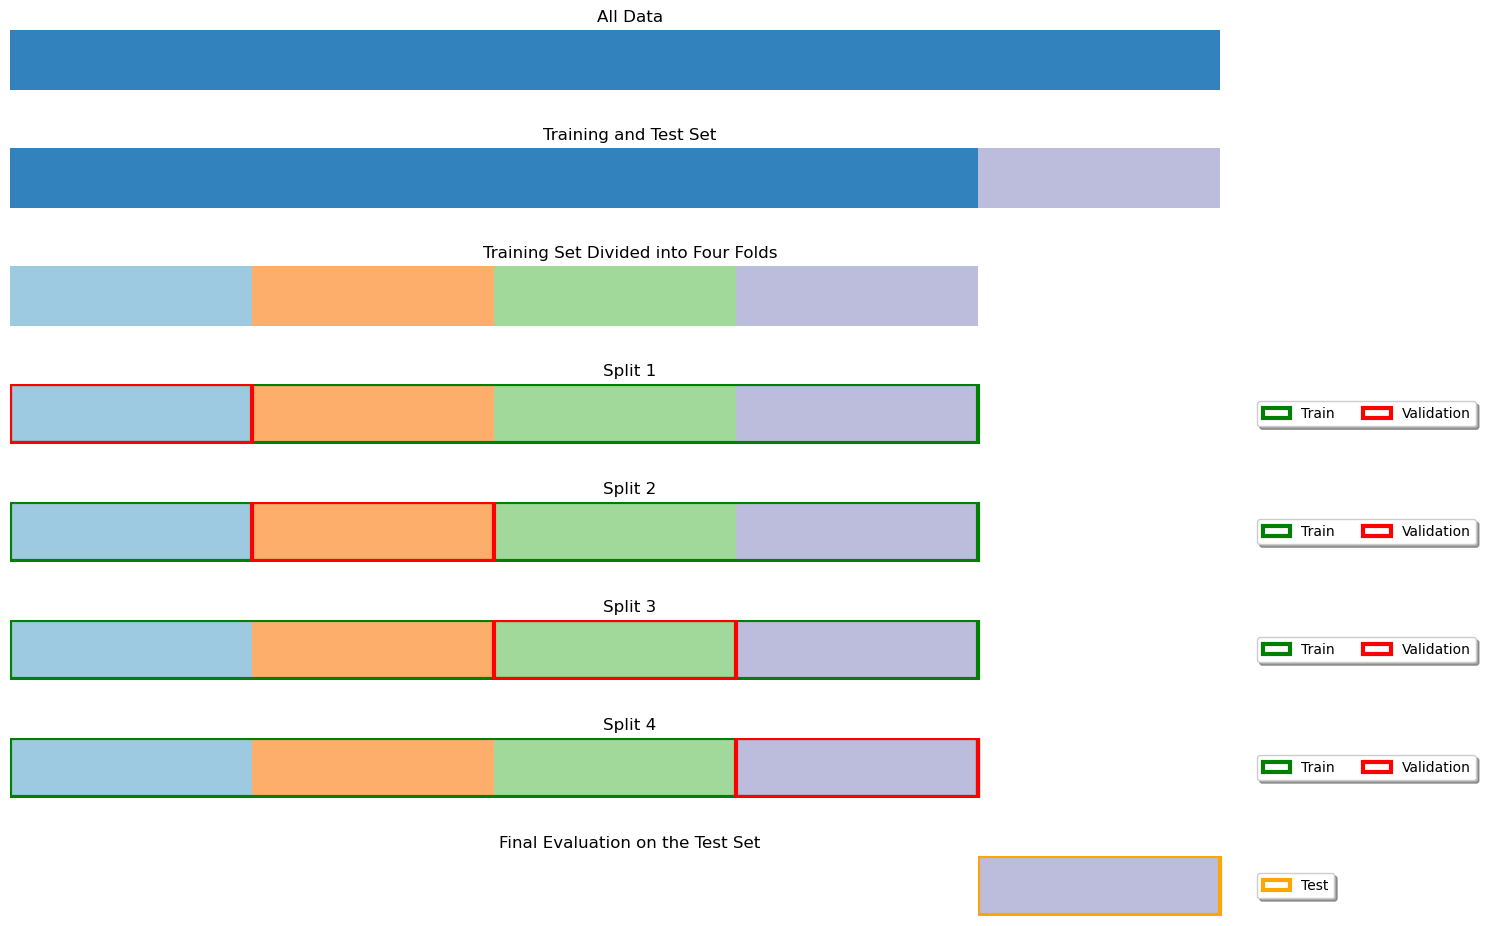

In [45]:
data=np.zeros((1,20))

train_test = data.copy()
train_test[:,16:]=7

crossval = train_test.copy()[:,:16]
for c in range(4):
    crossval[:,c*4:(c+1)*4]=c*2+1


_, axs = plt.subplots(nrows=8, ncols=1, figsize=(16,12), sharex=True)
axs[0].imshow(data, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[0].axis('off')
axs[0].set_title('All Data')

axs[0].set_xlim([-0.5,20])

axs[1].imshow(train_test, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[1].axis('off')
axs[1].set_title('Training and Test Set')

axs[2].axis('off')
axs[2].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[2].set_title('Training Set Divided into Four Folds')

axs[3].axis('off')
axs[3].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[3].add_patch(plt.Rectangle((-0.5,-0.5),16,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[3].add_patch(plt.Rectangle((-0.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Validation'))
axs[3].set_title('Split 1')

axs[4].axis('off')
axs[4].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[4].add_patch(plt.Rectangle((-0.5,-0.5),16,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[4].add_patch(plt.Rectangle((3.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Validation'))
axs[4].set_title('Split 2')

axs[5].axis('off')
axs[5].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[5].add_patch(plt.Rectangle((-0.5,-0.5),16,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[5].add_patch(plt.Rectangle((7.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Validation'))
axs[5].set_title('Split 3')

axs[6].axis('off')
axs[6].imshow(crossval, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[6].add_patch(plt.Rectangle((-0.5,-0.5),16,0.98, edgecolor='green', facecolor='none',linewidth=3, label='Train'))
axs[6].add_patch(plt.Rectangle((11.5,-0.5),4,0.98, edgecolor='red', facecolor='none',linewidth=3, label='Validation'))
axs[6].set_title('Split 4')

axs[7].axis('off')
axs[7].imshow(train_test, cmap='tab20c', interpolation='none', vmin=0, vmax=10)
axs[7].add_patch(plt.Rectangle((15.5,-0.5),4,0.98, edgecolor='orange', facecolor='none',linewidth=3, label='Test'))
axs[7].add_patch(plt.Rectangle((-0.5,-0.5),16,1, facecolor='white',linewidth=3))
axs[7].set_title('Final Evaluation on the Test Set')


axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[4].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)


axs[5].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[6].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

axs[7].legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=3, fancybox=True, shadow=True)

plt.show()


Again, if the dataset is large enough and the training procedure is computationally expensive, it is common to use a fixed split as illustrated above.

The `scikit-learn` library allows to easily perform hyperparameter search using cross-validation for different algorithms.

More in general, these techniques can be used to compare different models and select the best performing one.

## References
* Chapter 2 of James, Gareth Gareth Michael. An introduction to statistical learning: with applications in Python, 2023. https://www.statlearning.com
* https://en.wikipedia.org/wiki/Empirical_risk_minimization
* https://scikit-learn.org/stable/modules/cross_validation.html